# here we will predict the salary


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
import pickle

In [2]:
data=pd.read_csv('Churn_Modelling.csv')
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
# Preprocess the data
data = data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

In [4]:
# Encode categorical variables
label_encoder_gender = LabelEncoder()
data['Gender'] = label_encoder_gender.fit_transform(data['Gender'])

In [5]:
data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,1,39,5,0.00,2,1,0,96270.64,0
9996,516,France,1,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,0,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,1,42,3,75075.31,2,1,0,92888.52,1


In [6]:
# One-hot encode 'Geography'
onehot_encoder_geo = OneHotEncoder(handle_unknown='ignore')
geo_encoded = onehot_encoder_geo.fit_transform(data[['Geography']]).toarray()
geo_encoded_df = pd.DataFrame(geo_encoded, columns=onehot_encoder_geo.get_feature_names_out(['Geography']))
geo_encoded_df


,Geography_France,Geography_Germany,Geography_Spain
0,1.0,0.0,0.0
1,0.0,0.0,1.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,0.0,0.0,1.0
...,...,...,...
9995,1.0,0.0,0.0
9996,1.0,0.0,0.0
9997,1.0,0.0,0.0
9998,0.0,1.0,0.0


In [7]:
# Combine one-hot encoded columns with original data
data = pd.concat([data.drop('Geography', axis=1), geo_encoded_df], axis=1)
data.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,1.0,0.0,0.0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0.0,0.0,1.0
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1.0,0.0,0.0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1.0,0.0,0.0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0.0,0.0,1.0


In [8]:
# Split the data into features and target
X = data.drop('EstimatedSalary', axis=1)
y = data[['EstimatedSalary']]


In [9]:
X

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,1,1.0,0.0,0.0
1,608,0,41,1,83807.86,1,0,1,0,0.0,0.0,1.0
2,502,0,42,8,159660.80,3,1,0,1,1.0,0.0,0.0
3,699,0,39,1,0.00,2,0,0,0,1.0,0.0,0.0
4,850,0,43,2,125510.82,1,1,1,0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,1,39,5,0.00,2,1,0,0,1.0,0.0,0.0
9996,516,1,35,10,57369.61,1,1,1,0,1.0,0.0,0.0
9997,709,0,36,7,0.00,1,0,1,1,1.0,0.0,0.0
9998,772,1,42,3,75075.31,2,1,0,1,0.0,1.0,0.0


In [10]:
y

,EstimatedSalary
0,101348.88
1,112542.58
2,113931.57
3,93826.63
4,79084.10
...,...
9995,96270.64
9996,101699.77
9997,42085.58
9998,92888.52


In [11]:
## Split the data in training and tetsing sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [12]:
X_train

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited,Geography_France,Geography_Germany,Geography_Spain
9254,686,1,32,6,0.00,2,1,1,0,1.0,0.0,0.0
1561,632,1,42,4,119624.60,2,1,1,0,0.0,1.0,0.0
1670,559,1,24,3,114739.92,1,1,0,1,0.0,0.0,1.0
6087,561,0,27,9,135637.00,1,1,0,1,1.0,0.0,0.0
6669,517,1,56,9,142147.32,1,0,0,1,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
5734,768,1,54,8,69712.74,1,1,1,0,1.0,0.0,0.0
5191,682,0,58,1,0.00,1,1,1,0,1.0,0.0,0.0
5390,735,0,38,1,0.00,3,0,0,1,1.0,0.0,0.0
860,667,1,43,8,190227.46,1,1,0,1,1.0,0.0,0.0


In [13]:
## Scale these features
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [14]:
X_train


array([[ 0.35649971,  0.91324755, -0.6557859 , ...,  1.00150113,
        -0.57946723, -0.57638802],
       [-0.20389777,  0.91324755,  0.29493847, ..., -0.99850112,
         1.72572313, -0.57638802],
       [-0.96147213,  0.91324755, -1.41636539, ..., -0.99850112,
        -0.57946723,  1.73494238],
       ...,
       [ 0.86500853, -1.09499335, -0.08535128, ...,  1.00150113,
        -0.57946723, -0.57638802],
       [ 0.15932282,  0.91324755,  0.3900109 , ...,  1.00150113,
        -0.57946723, -0.57638802],
       [ 0.47065475,  0.91324755,  1.15059039, ..., -0.99850112,
         1.72572313, -0.57638802]])

In [15]:
y_scaler = StandardScaler()
y_train = y_scaler.fit_transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [16]:
# Save the encoders and scaler for later use
with open('label_encoder_gender.pkl', 'wb') as file:
    pickle.dump(label_encoder_gender, file)

with open('onehot_encoder_geo.pkl', 'wb') as file:
    pickle.dump(onehot_encoder_geo, file)

with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

#### ANN Regression Problem statement

In [17]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [18]:
# Build the model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer for regression
])

## compile the model
model.compile(optimizer='adam',loss='mse',metrics=['mae'])

model.summary()

/opt/anaconda3/envs/mlops/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,945 (11.50 KB)

 Trainable params: 2,945 (11.50 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard
import datetime

# Set up TensorBoard
log_dir = "regressionlogs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1,write_graph=True,write_images=True )

In [20]:
# Set up Early Stopping
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)


In [21]:
# Train the model
history = model.fit(
    X_train, y_train,
    epochs=100,batch_size=32, validation_split=0.2,
    callbacks=[tensorboard_callback]
)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1.0267 - mae: 0.8707 - val_loss: 1.0007 - val_mae: 0.8588
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 694us/step - loss: 0.9935 - mae: 0.8588 - val_loss: 0.9974 - val_mae: 0.8577
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 670us/step - loss: 0.9860 - mae: 0.8528 - val_loss: 1.0084 - val_mae: 0.8616
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 692us/step - loss: 0.9806 - mae: 0.8532 - val_loss: 1.0095 - val_mae: 0.8615
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 622us/step - loss: 0.9710 - mae: 0.8499 - val_loss: 1.0033 - val_mae: 0.8618
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 628us/step - loss: 0.9697 - mae: 0.8504 - val_loss: 0.9982 - val_mae: 0.8586
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 638us/step - loss: 0.9739 - mae: 0.8490 - val_loss: 1.0048 - val_mae: 0.8613
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 608us/step - loss: 0.9733 - mae: 0.8460 - val_loss: 1.0054 - val_mae: 0.8611
Epoch 9/100
200/200 ━━━━━━━━━━━━━━

In [22]:
%load_ext tensorboard

In [23]:
%tensorboard --logdir regressionlogs/fit

In [24]:
## Evaluate model on the test data
test_loss,test_mae=model.evaluate(X_test,y_test)
print(f'Test MAE : {test_mae}')

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 457us/step - loss: 13539436544.0000 - mae: 100871.7656
Test MAE : 98726.140625


In [25]:
model.save('regression_model.h5')

In [26]:
y_pred = model.predict(X_test)
y_pred = y_scaler.inverse_transform(y_pred)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 516us/step


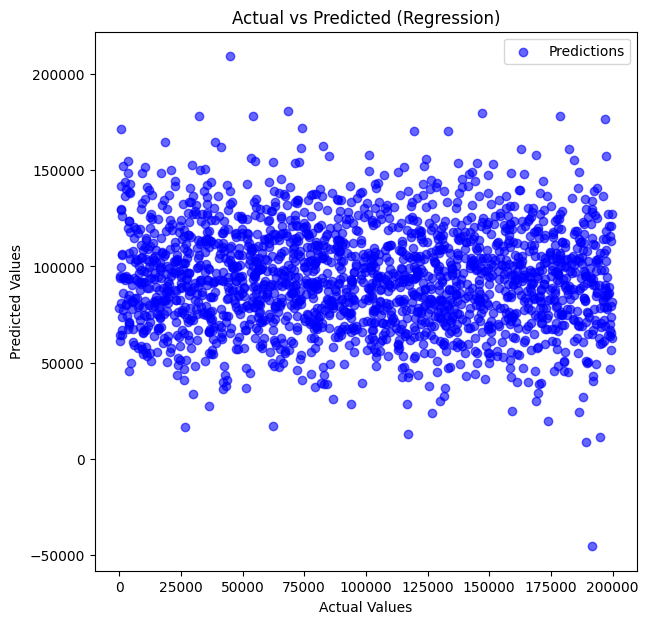

In [27]:
# --- Plot Actual vs Predicted ---
import matplotlib.pyplot as plt
plt.figure(figsize=(7,7))
plt.scatter(y_test, y_pred, alpha=0.6, color="blue", label="Predictions")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted (Regression)")
plt.legend()
plt.show()

In [29]:
data.corr()['EstimatedSalary']

CreditScore         -0.001384
Gender              -0.008112
Age                 -0.007201
Tenure               0.007784
Balance              0.012797
NumOfProducts        0.014204
HasCrCard           -0.009933
IsActiveMember      -0.011421
EstimatedSalary      1.000000
Exited               0.012097
Geography_France    -0.003332
Geography_Germany    0.010297
Geography_Spain     -0.006482
Name: EstimatedSalary, dtype: float64

👉 All correlations with EstimatedSalary are very close to zero (like -0.01, 0.01, 0.02).<br>
That means:<br>
	•	None of the input features (CreditScore, Age, Balance, Geography, etc.) have a strong relationship with EstimatedSalary.<br>
	•	If the features don’t explain salary, then no machine learning model — not even a deep neural net — can predict it well.<br>
	•	That’s why  ANN keeps outputting “near average salary” (the horizontal band in your plots).<br>